Higher-order differential equations involve derivatives of a function of order two or higher. They are fundamental in modeling systems where acceleration or higher rates of change are significant.

Real-world applications include:
*   **Physics and Engineering:** Describing oscillations, vibrations, and wave phenomena (e.g., motion of a pendulum, structural vibrations in bridges, electromagnetic waves).
*   **Control Systems:** Designing controllers to regulate system behavior (e.g., cruise control in cars, autopilot in aircraft).
*   **Biology:** Modeling population dynamics with more complex interactions or physiological processes (e.g., spread of diseases with latency periods).
*   **Economics:** Modeling economic growth or market fluctuations considering not just the rate of change but the rate of change of the rate of change.

**Examples of Higher-Order Differential Equations:**

*   **Second Order:**
    $y'' + p(x)y' + q(x)y = r(x)$  (General second-order linear non-homogeneous differential equation)
    $m\frac{d^2x}{dt^2} + b\frac{dx}{dt} + kx = F(t)$ (Damped harmonic oscillator equation, modeling mass-spring systems)

*   **Third Order:**
    $y''' + ay'' + by' + cy = f(x)$ (A general third-order linear differential equation)

*   **Fourth Order:**
    $\frac{\partial^4 w}{\partial x^4} = q(x)$ (Used in the theory of beams to model deflection)

Example: Free Fall

\\( \ddot{y} = -g\\) or

\\( \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g\\)

Analytical solution: \\( y(t)=-\frac{g}{2}t^2+v_0t+y_0\\)

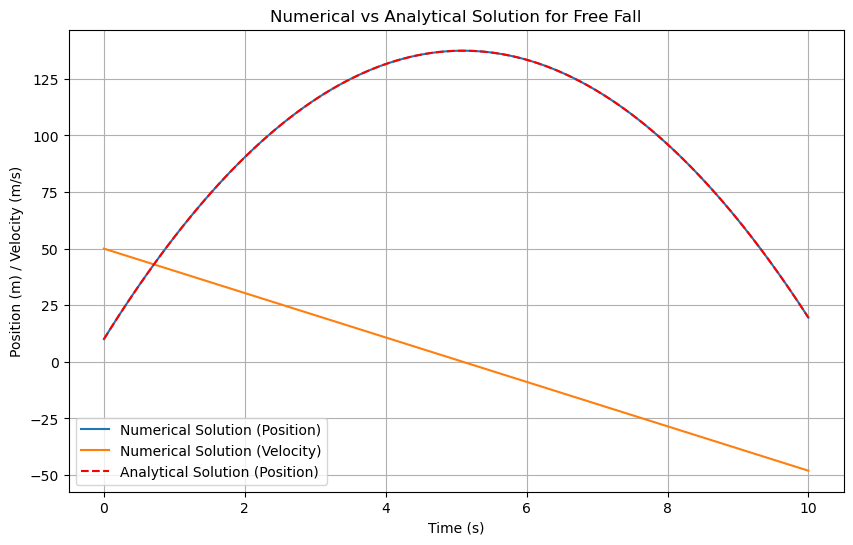

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the second-order ODE
def ode_system(t, y):
  # y[0] is y, y[1] is y_dot
  g = 9.81  # Acceleration due to gravity
  dydt = y[1]
  dy_dotdt = -g
  return [dydt, dy_dotdt]

# Set initial conditions
y0 = 10.0  # Initial position
v0 = 50.0 # Initial velocity
initial_conditions = [y0, v0]

# Set time span
t_start = 0.0
t_end = 10.0
t_eval = np.linspace(t_start, t_end, 100)

# Solve the ODE using solve_ivp (Runge-Kutta 45 method)
from scipy.integrate import solve_ivp
solution = solve_ivp(ode_system, [t_start, t_end], initial_conditions, t_eval=t_eval)

# Extract the results
time = solution.t
position = solution.y[0]
velocity = solution.y[1]

# Analytical solution
def analytical_solution(t, y0, v0, g):
  return -0.5 * g * t**2 + v0 * t + y0

analytical_position = analytical_solution(time, y0, v0, 9.81)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, position, label='Numerical Solution (Position)')
plt.plot(time, velocity, label='Numerical Solution (Velocity)')
plt.plot(time, analytical_position, '--', color='red',label='Analytical Solution (Position)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Velocity (m/s)')
plt.title('Numerical vs Analytical Solution for Free Fall')
plt.legend()
plt.grid(True)
plt.show()

### Harmonic Oscillator

The equation describes a damped pendulum:

\\( \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 \\)

Where:
- \\( \theta(t) \\) is the angular displacement at time \\( t \\).
- \\( b \\) is the damping parameter.
- \\( c \\) is determined by the length of the pendulum \\( l \\) and gravity \\( g \\), such that \\( c = \frac{g}{l} \\).

### Small-angle approximation

For small angles \\( \theta\ll 1 \\) and without damping b = 0, we have 

\\( \theta''(t) = - \frac{g}{l}\theta(t) \\) with the solution (for \\( \theta'(0) = 0 \\))

\\( \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) \\) and a period of \\( T = 2\pi\sqrt{\frac{l}{g}} \\)

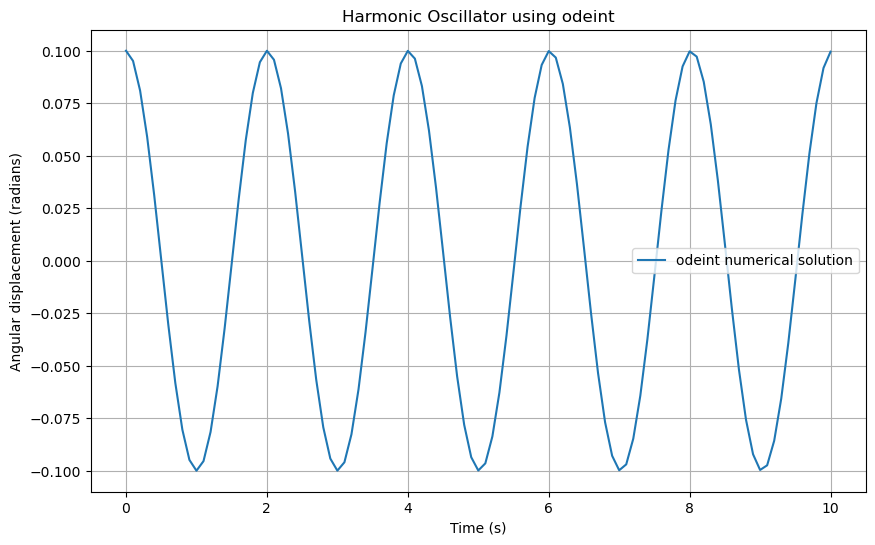

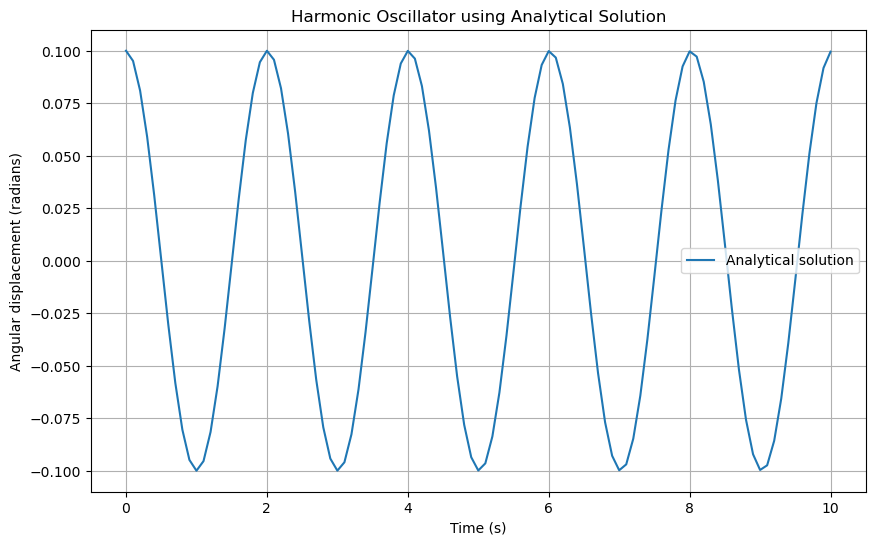

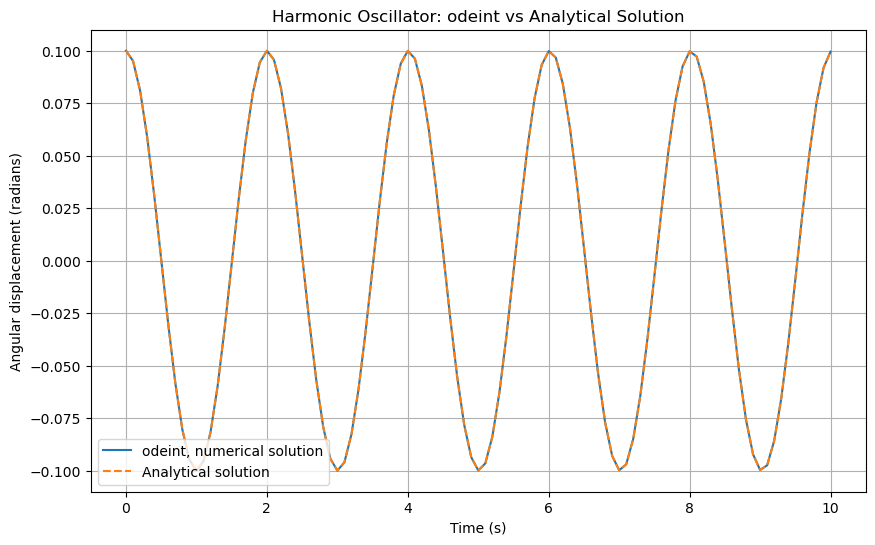

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#'odeint` is a function from the `scipy.integrate` module in Python. It is a versatile function used to numerically integrate 
#a system of ordinary differential equations (ODEs) with initial conditions.

#In the context provided, `odeint` is used to solve the second-order differential equation representing 
#the harmonic oscillator:

# Method 1: Using odeint (numerical integration)

def harmonic_oscillator_ode(y, t, g, l):
  theta, omega = y
  dydt = [omega, -(g/l) * theta]
  return dydt

# Parameters
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0   # length of the pendulum (m)
theta0 = 0.1 # initial angular displacement (radians)

# Initial conditions
y0 = [theta0, 0] # [initial theta, initial omega]

# Time points
t = np.linspace(0, 10, 101)

# Solve the ODE
solution_odeint = odeint(harmonic_oscillator_ode, y0, t, args=(g, l))

# Extract theta from the solution
theta_odeint = solution_odeint[:, 0]

# Plotting Method 1
plt.figure(figsize=(10, 6))
plt.plot(t, theta_odeint, label='odeint numerical solution')
plt.xlabel('Time (s)')
plt.ylabel('Angular displacement (radians)')
plt.title('Harmonic Oscillator using odeint')
plt.grid(True)
plt.legend()
plt.show()


# Method 2: Analytical solution (for simple harmonic motion)

def harmonic_oscillator_analytical(t, theta0, g, l):
  omega = np.sqrt(g/l)
  return theta0 * np.cos(omega * t)

# Parameters (same as above)
g = 9.81
l = 1.0
theta0 = 0.1

# Time points (same as above)
t = np.linspace(0, 10, 101)

# Calculate the analytical solution
theta_analytical = harmonic_oscillator_analytical(t, theta0, g, l)

# Plotting Method 2
plt.figure(figsize=(10, 6))
plt.plot(t, theta_analytical, label='Analytical solution')
plt.xlabel('Time (s)')
plt.ylabel('Angular displacement (radians)')
plt.title('Harmonic Oscillator using Analytical Solution')
plt.grid(True)
plt.legend()
plt.show()

# Optionally, plot both solutions together for comparison
plt.figure(figsize=(10, 6))
plt.plot(t, theta_odeint, label='odeint, numerical solution')
plt.plot(t, theta_analytical, label='Analytical solution', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angular displacement (radians)')
plt.title('Harmonic Oscillator: odeint vs Analytical Solution')
plt.grid(True)
plt.legend()
plt.show()